# Gaussians

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import bernoulli

## The Law of Large Numbers

Lets keep increasing the length of the sequence of coin flips n, and compute a running average $S_n$ of the coin-flip random variables,
$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i .$$
We plot this running mean, and notice that it converges to the mean of the distribution from which the random variables are plucked, ie the Bernoulli distribution with p=0.5. 

In [2]:
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [3]:
random_flips = throw_a_coin(10000)
running_means = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    running_means[i-1] = np.mean(random_flips[:i])

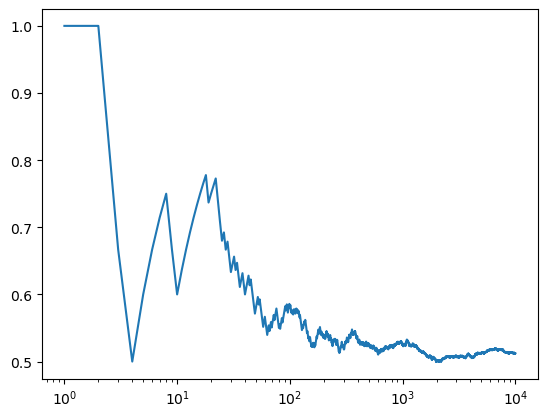

In [4]:
plt.plot(sequence_lengths, running_means);
plt.xscale('log')


This is an example of a very important theorem in statistics, the law of large numbers, which says this:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables. Suppose that $X$ has the finite mean $\mu$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to the mean of the variables $\mu$ as $n \to \infty$:**

$$ S_n \to \mu \, as \, n \to \infty. $$

## Frequentist Statistics

Answers the question: **What is Data?** with

>"data is a **sample** from an existing **population**"

- data is stochastic, variable, in the sense that you can draw different samples
- model the sample. The model may have parameters
- The parameters are considered **FIXED**, and there is a **true value** in our population
- However, we can only find parameters for our sample, since in real-life we usually only get to see one sample.
- If we could somehow access multiple samples, these parameters would vary from sample to sample



## Samples from a population of coin flips

Having now established something about long sequences of random variables, lets turn to samples from the population of random numbers.

Lets redo the experiment with coin flips that we started earlier.

We'll establish some terminology at first. What we'll do different here is to do a large set of **replications** M, in each of which we did many coin flips, or **observations** N.  We'll call **a single replication a sample of observations**. Thus the number of samples is M, and the sample size is N. 

![](images/grid.png)

These samples have been chosen from a population of size $n >> N$. If this reminds you of elections, thats intentional.

We'll now calculatethe mean over the observations in a sample, or sample mean, for a sample size of 10, with 20 replications. There are thus 20 means.

In [5]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:] = throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [6]:
make_throws(number_of_samples=20, sample_size=10)

array([0.3, 0.8, 0.5, 0.6, 0.3, 0.7, 0.5, 0.3, 0.6, 0.4, 0.3, 0.4, 0.6,
       0.5, 0.6, 0.5, 0.3, 0.4, 0.4, 0.4])

So this gives us 20 means

### Increasing sample size, and number of replications

Let us now do 200 replications, each of which has a sample size of 1000 flips, and store the 200 means for each sample size from 1 to 1000 (in strides of 10) in `sample_means`. This will take a bit of time to run.

In [7]:
sample_sizes=np.arange(1,1001,10)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

Lets formalize what we are up to. Lets call the N random variables in the $m^{th}$ sample $x_{m1},x_{m2},...,x_{mN}$ and lets define the sample mean

$$\bar{x_m}(N) = \frac{1}{N}\, \sum_{i=1}^{N} x_{mi} $$

Now imagine the size of the sample becoming large, asymptoting to the size of an infinite or very large population (ie the sample becomes the population). Then you would expect the sample mean to approach the mean of the population distribution. This is just a restatement of the law of large numbers.

Of course, if you drew many different samples of a size N (which is not infinite), the sample means $\bar{x_1}$, $\bar{x_2}$, etc would all be a bit different from each other. But the law of large numbers intuitively indicates that as the sample size gets very large and becomes an infinite population size, these slightly differeing means would all come together and converge to the population (or distribution) mean.

To see this lets define, instead, the mean or expectation of the sample means over the set of samples or replications, at a sample size N:

$$E_{\{R\}}(\bar{x}) = \frac{1}{M} \,\sum_{m=1}^{M} \bar{x_m}(N) ,$$
where $\{R\}$ is the set of M replications, and calculate and plot this quantity.

In [8]:
mean_of_sample_means = [np.mean(means) for means in sample_means]
len(mean_of_sample_means)

100

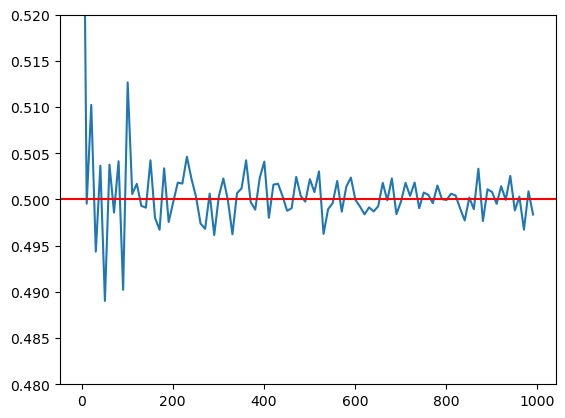

In [9]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);
plt.axhline(0.5, 0, 1, color="r")

Not surprisingly, the mean of the sample means converges to the distribution mean as the sample size N gets very large.


## The notion of a Sampling Distribution

In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a **sampling distribution**. 

Since, in the real world, we see only one sample, this distribution helps us do **inference**, or figure the uncertainty of the estimates of quantities we are interested in. If we can somehow cook up samples just somewhat different from the one we were given (this is the idea behind the bootstrap), we can calculate quantities of interest, such as the mean on each one of these samples. By seeing how these means vary from one sample to the other, we can say how typical the mean in the sample we were given is, and whats the uncertainty range of this quantity. This is why the mean of the sample means is an interesting quantity; it characterizes the **sampling distribution of the mean**, or the distribution of sample means.

We can see this mathematically by writing the mean or expectation value of the sample means thus:

$$E_{\{R\}}(N\,\bar{x}) = E_{\{R\}}(x_1 + x_2 + ... + x_N) = E_{\{R\}}(x_1) + E_{\{R\}}(x_2) + ... + E_{\{R\}}(x_N)$$

Now in the limit of a very large number of replications, each of the expectations in the right hand side can be replaced by the population mean using the law of large numbers! Thus:

\begin{eqnarray*}
E_{\{R\}}(N\,\bar{x}) &=& N\, \mu\\
E(\bar{x}) &=& \mu
\end{eqnarray*}

which tells us that in the limit of a large number of replications the expectation value of the sampling means converges to the population mean. This limit gives us the true sampling distribution, as opposed to what we might estimate from our finite set of replicates.

Lets make many replicates (M=1000) instead to see what the "true" sampling distribution looks like as a function of sample size.(Caution: This takes a few minutes to run!]

In [10]:
sample_means_1000_replicates = [make_throws(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_means_1000 = [np.mean(means) for means in sample_means_1000_replicates]

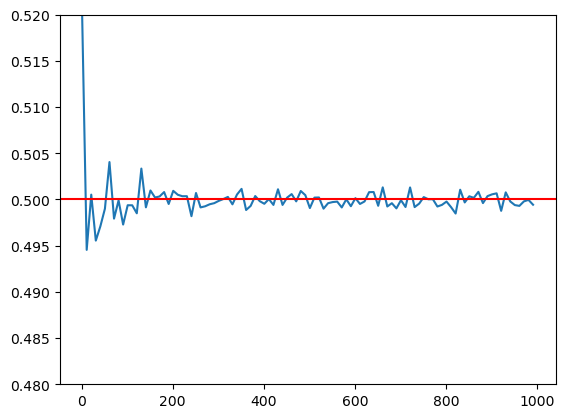

In [11]:
plt.plot(sample_sizes, mean_of_sample_means_1000);
plt.ylim([0.480,0.520]);
plt.axhline(0.5, 0, 1, color="r")

### The sampling distribution as a function of sample size

We can see what the estimated sampling distribution of the mean looks like at different sample sizes.

In [12]:
len(sample_means)

100

Lets plot the distribution of the mean as a function of sample size.

In [13]:
sample_sizes[1], sample_sizes[40], sample_sizes[99]

(11, 401, 991)

200 replicates:

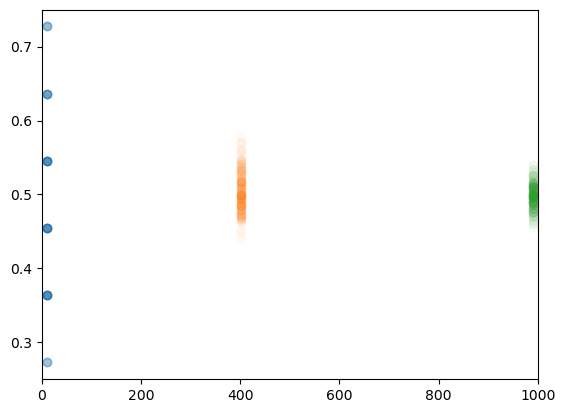

In [14]:
for i in [1, 40, 99]:
    plt.scatter([sample_sizes[i]]*200, sample_means[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

1000 replicates:

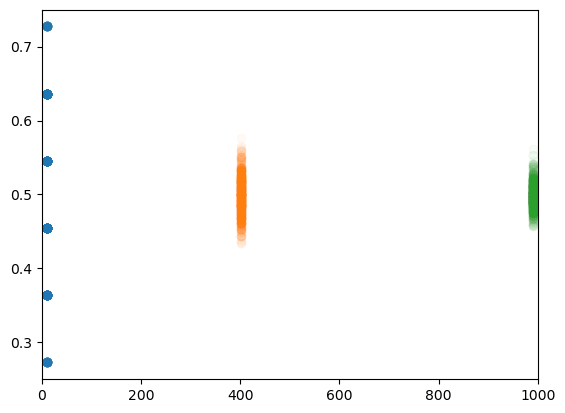

In [15]:
for i in [1, 40, 99]:
    plt.scatter([sample_sizes[i]]*1000, sample_means_1000_replicates[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

In [16]:
std_of_sample_means_1000 = [np.std(means) for means in sample_means_1000_replicates]

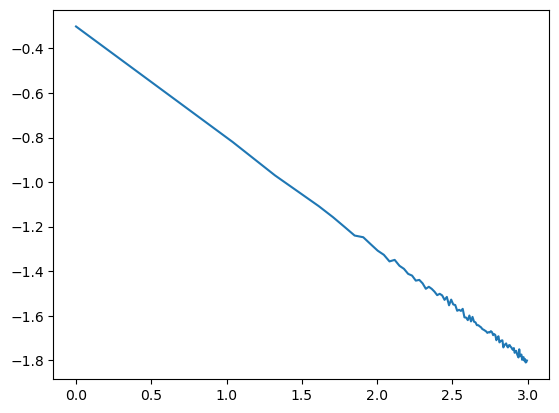

In [17]:
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means_1000));

In [18]:
np.mean(np.diff(np.log10(std_of_sample_means_1000))/np.diff(np.log10(sample_sizes)))

-0.5010753504617473

Notice the power of negative half.

Let us plot again the distribution of sample means at a large sample size, $N=1000$. What distribution is this?

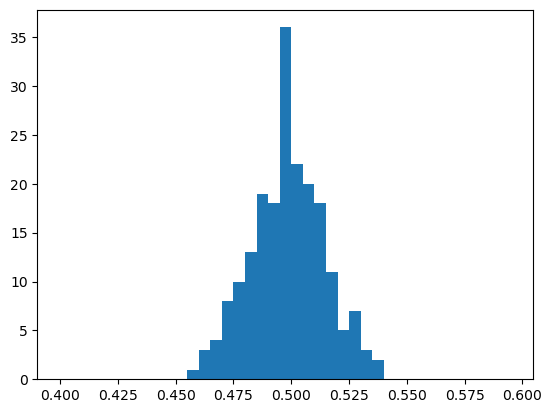

In [19]:
plt.hist(sample_means[99], bins=np.arange(0.4,0.6,0.005));

This is a **Gaussian** with sample standard deviation scaling as $1/\sqrt{N}$.

### The Gaussian Distribution

The sampling distribution of the mean itself has a mean $\mu$ and variance $s^2 = \frac{\sigma^2}{N}$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

The probability density of the normal distribution is given as:

$$ N(x, \mu, \sigma) = \frac{1}{s\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2s^2} } .$$

$s$ is called the **standard error**.

Lets step back and try and think about what this all means. As an example, say I have a weight-watchers' study of 1000 people, whose average weight is 150 lbs with standard deviation of 30lbs. If I was to randomly choose many samples of 100 people each, the mean weights of those samples would cluster around 150lbs with a standard error of 30/$\sqrt{100}$ = 3lbs. Now if i gave you a different sample of 100 people with an average weight of 170lbs, this weight would be more than 6 standard errors beyond the population mean, ^[this example is motivated by the crazy bus example in Charles Whelan's excellent Naked Statistics Book] and would thus be very unlikely to be from the weight watchers group.

The expected value of the Gaussian distribution is $E[X]=\mu$ and the variance is $Var[X]=s^2$.

## The Central Limit Theorem

The reason for the distribution's importance is the Central Limit Theorem(CLT). The theorem is stated as thus, very similar to the law of large numbers:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$

In other words:

$$s^2 = \frac{\sigma^2}{N}.$$


This is true, *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

Strictly speaking, under some conditions ^[REF :Lyapunov conditions], the variables $x_i$ dont have to be identically distributed, as long as $\mu$ is the mean of the means and $\sigma^2$ is the sum of the individual variances. This has major consequences, for the importance of this theorem.

Many random variables can be thought of as having come from the sum of a large number of small and independent effects. For example human height or weight can be thought of as the sum as a large number of genetic and environmental factors, which add to increase or decrease height or weight respectively. Or think of a measurement of a height. There are lots of ways things could go wrong: frayed tapes, stretched tapes, smudged marks, bad lining up of the eye, etc. These are all independent and have no systematic error in one direction or the other.

Then the sum of these factors, as long as there are a large number of them, will be distributed as a gaussian.

As a rule of thumb, the CLT starts holding at $N \sim 30$.

## Monte-Carlo as a function of number of samples

How does the accuracy depends on the number of points(samples)? Lets try the same 1-D integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx $ as a function of the number of points. 

In [20]:
def f(x):
    return x**2 + 4*x*np.sin(x) 

def intf(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

/var/folders/td/94qngg4x2_lcb32n6td6t7540000gn/T/ipykernel_18388/1268605488.py:12: RuntimeWarning: invalid value encountered in scalar divide
  Imc[N]= (b-a) * np.sum(Y)/ N;


Text(0, 0.5, 'sqrt((Imc-ExactValue)$^2$)')

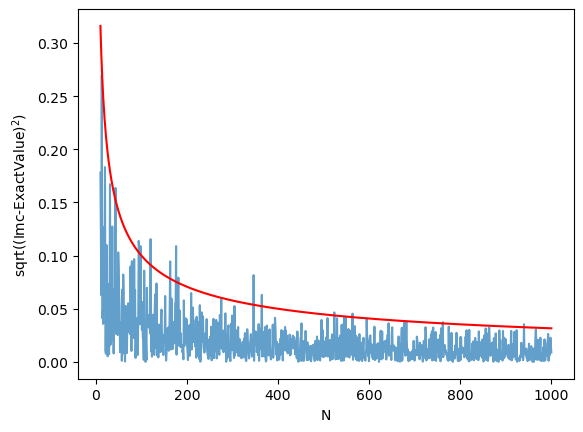

In [21]:
a = 2;    
b = 3;
Imc=np.zeros(1000)
Na = np.linspace(0,1000,1000)

exactval= intf(b)-intf(a)

for N in np.arange(0,1000):
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 

    Imc[N]= (b-a) * np.sum(Y)/ N;
    
    
plt.plot(Na[10:],np.sqrt((Imc[10:]-exactval)**2), alpha=0.7)
plt.plot(Na[10:], 1/np.sqrt(Na[10:]), 'r')
plt.xlabel("N")
plt.ylabel("sqrt((Imc-ExactValue)$^2$)")

Obviously this depends on the number of $N$ as $1/\sqrt{N}$. 

### Errors in MC

Monte Carlo methods yield approximate
answers whose accuracy depends on the number of draws.
So far, we have used our knowledge of the exact value  to determine that the
error in the Monte Carlo method approaches zero as approximately $1/\sqrt{N}$ for large $N$, where $N$ is the number of trials. 

But in the usual case, the exact answer is unknown. Why do this otherwise?

So, lets repeat the same evaluation $m$ times and check the variance of the estimate. 

11.811312177720577 0.004122018142734197


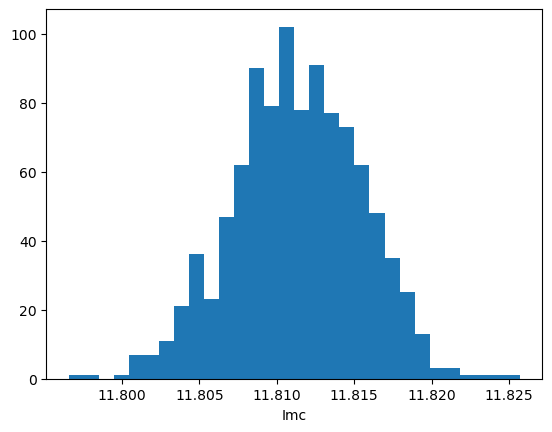

In [22]:
# multiple MC estimations
m=1000
N=10000
Imc=np.zeros(m)


for i in np.arange(m):
    
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 

    Imc[i]= (b-a) * np.sum(Y)/ N;
    
    
plt.hist(Imc, bins=30)
plt.xlabel("Imc")
print(np.mean(Imc), np.std(Imc))


This looks like our telltale Normal distribution.

This is not surprising

### Estimating the error in MC integration using the CLT.

We know from the CLT that if $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$, and that if $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. 

Then, 

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$


This is true *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

The sums

$$S_n(f) = \frac{1}{n} \sum_{i=1}^{n} f(x_i) $$

are exactly what we want to calculate for Monte-Carlo Integration(due to the LOTUS) and correspond to the random variable f(X) where X is uniformly distributed on the support.

Whatever the original variance of f(X) might be, we can see that the variance of the sampling distribution of the mean goes down as $1/n$ and thus the standard error goes down as $1/\sqrt{n}$ as we discovered when we compared it to the exact value as well.

Why is this important?




### Comparing to standard integration techniques

What if we changed the dimensionality of the integral? The formula for $S_n$ does not change, we just replace $g(x_i)$ by $g(x_i, y_i, z_i...)$. Thus, the CLT still holds and the error still scales as $\frac{1}{\sqrt{n}}$.

On the other hand, if we divide the $a, b$-interval into $N$ 
steps and use some regular integration routine, what is the error? Consider the midpoint rule as illustrated in this diagram from Wikipedia:

![](https://upload.wikimedia.org/wikipedia/commons/5/5b/Rectangle_rule.gif)

The basic idea is that the function value at the midpoint of the interval is used as the height of the approximating rectangle. In general, the differing methods consist of choosing different $x_i$ below..with left being at the left end, right being at the right end. 
$$I(est) = \sum_i f(x_i)\Delta x_i = \frac{b-a}{n} \sum_i f(x_i)$$

The error on the estimation of the integral can be shown to decrease as $\frac{1}{n^2}$. The basic reason for this can be understood on a taylor series expansion of the function to second order. When you integrate on the sub-interval, the linear term vanishes while the quadratic term becomes cubic in $\Delta x$. So the local error goes as $\frac{1}{n^3}$ and thus the global as  $\frac{1}{n^2}$.

Monte-Carlo if clearly not competitive with the midpoint method in 1-D. Its actually not even competitive with left or right rectangle methods.

The trapeziod rule uses a line between the sub-interval points while the  Simpsons rule uses a quadratic.

These integrations can be generalized  to multiple dimensions, and the rule for these


* left or right rule:  $\propto 1/n$
* Midpoint rule: $\propto 1/n^2$
* Trapezoid: $\propto 1/n^2$
* Simpson: $\propto 1/n^4$

where $n=N^{1/d}$. MC becomes better than the Simpson method only in 8 dimensions..